# **This will take about 10 minutes.**

# **You Can Drink Coffe For A While.**

# **開始處理資料**

# 下載 Mask 資料

# 處理 Mask 圖片 (相同的加起來)

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#顯示csv檔案的前幾行內容
def view_file(nam, row):
  with open(nam,encoding="utf-8") as infile:  
    i = 0
    for line in infile:   
      print(line)
      if(i==row):
        break
      i+=1  

In [ ]:
view_file(r'C:\Users\sky66\fiftyone\open-images-v6\validation\labels\segmentations.csv', 2)

In [ ]:
view_file(r'C:\Users\sky66\fiftyone\open-images-v6\validation\metadata\image_ids.csv', 10)

In [ ]:
mask_path = "C:/Users/sky66/fiftyone/open-images-v6/validation/labels/masks/"

In [ ]:
#img1 img1是2張黑白圖片的檔案名稱
#將兩張黑白圖片加起來儲存
def add(img1,img2):
    img3 = cv2.imread(img1,cv2.IMREAD_GRAYSCALE)
    img4 = cv2.imread(img2,cv2.IMREAD_GRAYSCALE) 
    new_img_name = img1.split(".png")[0].split("_")[0]+".png"  
    img = img3+img4  
    img = np.where(img>0,255,0)        
    cv2.imwrite(new_img_name,img) 

In [ ]:
#只把人的Masks留下來作為訓練用 (check這個class是否為"人類")
def check_class(name):
  csv_class = None
  class_content = []
  with open(r'C:\Users\sky66\fiftyone\open-images-v6\validation\labels\segmentations.csv',encoding="utf-8") as infile:  
     for i in infile:
       class_content = (i.split('\n')[0].split(','))
       if class_content[0]==name:
          if not(class_content[2]=="/m/05r655" or class_content[2]=="/m/03bt1vf" or class_content[2]=="/m/01bl7v" or class_content[2]=="/m/01g317"):
            return "finded"
          break

In [ ]:
with open(r'C:\Users\sky66\fiftyone\open-images-v6\validation\labels\segmentations.csv',encoding="utf-8") as infile:  
    ii = 0
    for i in infile:
        content = (i.split('\n')[0].split(','))
        # /m/05r655 /m/03bt1vf /m/01bl7v /m/01g317
        
        if content[2]=="/m/01bl7v":
            name = content[0].split("_")[0] 
            with open(r'C:\Users\sky66\fiftyone\open-images-v6\validation\metadata\image_ids.csv',encoding="utf-8") as infile1:
                for i1 in infile1:
                    content1 = (i1.split('\n')[0].split(','))
                    if content1[0]==name :
                        print(content1[2])
                        break
            ii += 1
        if ii==30 :
            break

In [ ]:
#只把人的Masks留下來作為訓練用，剩下的刪除。
def rm(path_id):
  file_names=None

  # 指定要列出所有檔案的目錄
  mypath = r"C:/Users/sky66/fiftyone/open-images-v6/validation/labels/masks/"+path_id
  
  for dirPath, dirNames, fileNames in os.walk(mypath):
      file_names=fileNames
  for i in file_names:
      if check_class(i)=="finded":
          os.remove(r"C:/Users/sky66/fiftyone/open-images-v6/validation/labels/masks/"+path_id+"/"+i)

In [ ]:
for i in range(0,10):
    rm(str(i))

In [ ]:
for i in ["A","B","C","D","E","F"]:
    rm(str(i))

In [ ]:
mask_path = "C:/Users/sky66/fiftyone/open-images-v6/validation/labels/masks/"
def final_image(path_id):
    file_names=None

    # 指定要列出所有檔案的目錄
    mypath = mask_path+path_id
    
    for dirPath, dirNames, fileNames in os.walk(mypath):
        file_names=sorted(fileNames)
        
    n = []
    for i in range(0,len(file_names)):
        try:
            a = file_names[i].split("_")[0]
            if a==n[-1][0].split("_")[0]:
                n[-1].append(file_names[i])
            else :
                n.append([file_names[i]])
        except  :  
            n.append([file_names[i]])  
    
    for i in n :
        a = mask_path+path_id+"/"+i[0]
        if len(i)==1 :
            try:
                img = cv2.imread(a,cv2.IMREAD_GRAYSCALE)
                cv2.imwrite(a.split("_")[0]+".png",img) 
                os.remove(a)
            except :
                pass
        else :
            try :
                cv2.imwrite(a.split("_")[0]+".png",np.zeros(shape=cv2.imread(a,cv2.IMREAD_GRAYSCALE).shape, dtype="uint8"))
                a = a.split("_")[0]+".png"
                for ii in i :
                    add(a,mask_path+path_id+"/"+ii)
            except :
                pass  
    
    file_names=None
    
    
    for dirPath, dirNames, fileNames in os.walk(mypath):
        file_names=sorted(fileNames)
    n = []
    for i in range(0,len(file_names)):
        try:
            a = file_names[i].split("_")[0]
            if a==n[-1][0].split("_")[0]:
                n[-1].append(file_names[i])
            else :
                n.append([file_names[i]])
        except  :  
            n.append([file_names[i]])
    for i in n:  
        if len(i)!=1 :
            for ii in i :
                os.remove(mask_path+path_id+"/"+ii)            

In [ ]:
for i in range(0,10):
    final_image(str(i))
for i in ["A","B","C","D","E","F"]:
    final_image(str(i))    

In [ ]:
file_names=None

# 指定要列出所有檔案的目錄
mypath = r"C:\Users\sky66\fiftyone\open-images-v6\validation\labels\masks\0"

for dirPath, dirNames, fileNames in os.walk(mypath):
    file_names=sorted(fileNames)
    
#file_names = [mask_path+"0/"+i for i in file_names]    

In [ ]:
view_file(r'C:\Users\sky66\fiftyone\open-images-v6\train\metadata\image_ids.csv')

In [ ]:
csv_class = None
class_content = []
with open(r'C:\Users\sky66\fiftyone\open-images-v6\train\metadata\image_ids.csv',encoding="utf-8") as infile:  
   for i in infile:
     class_content = (i.split('\n')[0].split(','))
     if class_content[0]=="0b9aec984321bf53":
        print(class_content)
        break

In [ ]:
csv_content

In [ ]:
gc.collect()

# 下載訓練圖片

In [ ]:
import os, shutil

In [ ]:
# 原先一堆放mask資料夾的資料夾名，現在整合這些資料夾裡的資料至新資料夾。
dirc = "C:\\Users\\sky66\\fiftyone\\open-images-v6\\validation\\labels\\masks\\"
image = [str(v) for v in range(0,10)]+["A","B","C","D","E","F"]
image = [dirc+v for v in image]

In [ ]:
# 放mask的新資料夾
newd = "C:\\Users\\sky66\\fiftyone\\open-images-v6\\validation\\labels\\masks\\Test"

In [ ]:
os.mkdir(newd)

In [ ]:
for e in image:
    for f in os.listdir(e):
        old_path = e+"\\"+f
        new_path = newd + "\\"+".".join(f.split(".")[0:2])
        shutil.move(old_path, new_path)

In [ ]:
# 刪除放mask的舊資料夾
for e in image:
    os.removedirs(e)

In [ ]:
image = [e for e in os.listdir(newd)] 

In [ ]:
# 放新圖片的新資料夾
images = "C:\\Users\\sky66\\fiftyone\\open-images-v6\\validation\\labels\\Images"

In [ ]:
os.mkdir(images)

In [ ]:
import requests

In [ ]:
image[50].split(".")[0]

In [ ]:
with open(r'C:\Users\sky66\fiftyone\open-images-v6\validation\metadata\image_ids.csv' ,encoding="utf-8") as infile:  
    for line in infile: 
        line = line.split(",")
        if line[0]=='0db22b60fc29dc1a':
            print(line[2])
            break

In [ ]:
# 從csv檔案對應mask名稱找到目標圖片並下載至新資料夾

def getIMG(source):
    
    src = source.split(".")[0] 
    url = 0
    with open(r'C:\Users\sky66\fiftyone\open-images-v6\validation\metadata\image_ids.csv' ,encoding="utf-8") as infile:  
        for line in infile: 
            line = line.split(",")
            if line[0]==src:
                url = line[2]
                break
    
    file = images+"\\"+src+".jpg"
    res = requests.get(url, stream = True)
    if res.status_code == 200:
        with open(file,'wb') as f:
            shutil.copyfileobj(res.raw, f)
    else:
        os.remove(newd+"\\"+source)

In [ ]:
import concurrent.futures
for n in range(0,len(image),10):
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        for i in image[n:n+10]:
            executor.submit(getIMG, i)     

In [ ]:
[0,1,2][0:10]

# 調整圖片大小

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 放新圖片的新資料夾
images = "C:\\Users\\sky66\\fiftyone\\open-images-v6\\validation\\labels\\Images"

In [ ]:
size = (256,256)

In [ ]:
for e in os.listdir(images):
    fil = images+"\\"+e
    a = cv2.imread(fil)
    a = cv2.resize(a, size)
    cv2.imwrite(fil, a)

In [ ]:
# 放mask的新資料夾
newd = "C:\\Users\\sky66\\fiftyone\\open-images-v6\\validation\\labels\\masks\\Test"

In [ ]:
for e in os.listdir(newd):
    fil = newd+"\\"+e
    a = cv2.imread(fil)
    a = cv2.resize(a, size)
    cv2.imwrite(fil, a)

# 模組訓練

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array, array_to_img
import os
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.backend as K

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
# 參考網站
# https://www.kaggle.com/code/phylake1337/99-loss-simple-sol-using-u-net-keras-tf
# https://github.com/petrosgk/Kaggle-Carvana-Image-Masking-Challenge/blob/master/model/u_net.py
# https://www.gushiciku.cn/pl/pdkd/zh-tw
# https://www.tensorflow.org/tutorials/keras/save_and_load

In [6]:
path = "C:\\Users\\sky66\\fiftyone\\open-images-v6\\validation\\labels\\new"

# 放mask
newd = []



# 放新圖片
images = []

for i in os.listdir(path):
    if i.split(".")[1]=="png":
        newd.append(i)
    else:
        images.append(i)

In [10]:
mask = sorted(newd)
image = sorted(images)

In [11]:
train = int(len(mask)*0.8)
val = len(image)-train

In [12]:
train_img = image[0:train]
train_mask = mask[0:train]

val_img = image[train:]
val_mask = mask[train:]

In [13]:
input_size = [256, 256, 3]
def data_generator(images_path, masks_path, image_ids, mask_ids, batch_size, img_size=input_size):
    '''
    images_path/masks_path: Images/Masks folder directory.
    images_ids/mask_ids: Ids for '.jpg' images/masks.
    img_size: Generated imgs/masks size.
    
    returns: batch of randomly-selected car&mask images value-scaled (0 -> 1). 
    '''
    data_size = len(image_ids)
    while True:
        #Choose random indice for later picking.
        rnd_ind = np.random.choice(np.arange(data_size),batch_size)
        imgs = []
        masks = []
        for i in rnd_ind:
            #Pick a random id for car&mask images.
            img_id, mask_id = image_ids[i], mask_ids[i]
            #Load/resize images.
            img = load_img(images_path +"\\" + img_id, target_size=img_size) 
            mask = load_img(masks_path +"\\" + mask_id, target_size=img_size[:-1], color_mode = 'grayscale')
            #Add to the batch data.
            imgs.append(img_to_array(img))
            masks.append(img_to_array(mask).reshape(img_size[:-1] + [1]))
        yield np.array(imgs, dtype=np.float16) / 255., np.array(masks, dtype=np.float16) / 255.

In [14]:
def dice_coef(y_true, y_pred):
    '''
    Metric
    '''
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


def dice_loss(y_true, y_pred):
    '''
    Loss function
    '''
    loss = 1 - dice_coef(y_true, y_pred)
    return loss


def bce_dice_loss(y_true, y_pred):
    '''
    Mixed crossentropy and dice loss.
    '''
    loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [15]:
# https://github.com/petrosgk/Kaggle-Carvana-Image-Masking-Challenge/blob/master/model/u_net.py
def get_unet_256(input_shape=(256, 256, 3),
                 num_classes=1):
    inputs = Input(shape=input_shape)
    # 256

    down0 = Conv2D(32, (3, 3), padding='same')(inputs)
    down0 = BatchNormalization()(down0)
    down0 = Activation('relu')(down0)
    down0 = Conv2D(32, (3, 3), padding='same')(down0)
    down0 = BatchNormalization()(down0)
    down0 = Activation('relu')(down0)
    down0_pool = MaxPooling2D((2, 2), strides=(2, 2))(down0)
    # 128

    down1 = Conv2D(64, (3, 3), padding='same')(down0_pool)
    down1 = BatchNormalization()(down1)
    down1 = Activation('relu')(down1)
    down1 = Conv2D(64, (3, 3), padding='same')(down1)
    down1 = BatchNormalization()(down1)
    down1 = Activation('relu')(down1)
    down1_pool = MaxPooling2D((2, 2), strides=(2, 2))(down1)
    # 64

    down2 = Conv2D(128, (3, 3), padding='same')(down1_pool)
    down2 = BatchNormalization()(down2)
    down2 = Activation('relu')(down2)
    down2 = Conv2D(128, (3, 3), padding='same')(down2)
    down2 = BatchNormalization()(down2)
    down2 = Activation('relu')(down2)
    down2_pool = MaxPooling2D((2, 2), strides=(2, 2))(down2)
    # 32

    down3 = Conv2D(256, (3, 3), padding='same')(down2_pool)
    down3 = BatchNormalization()(down3)
    down3 = Activation('relu')(down3)
    down3 = Conv2D(256, (3, 3), padding='same')(down3)
    down3 = BatchNormalization()(down3)
    down3 = Activation('relu')(down3)
    down3_pool = MaxPooling2D((2, 2), strides=(2, 2))(down3)
    # 16

    down4 = Conv2D(512, (3, 3), padding='same')(down3_pool)
    down4 = BatchNormalization()(down4)
    down4 = Activation('relu')(down4)
    down4 = Conv2D(512, (3, 3), padding='same')(down4)
    down4 = BatchNormalization()(down4)
    down4 = Activation('relu')(down4)
    down4_pool = MaxPooling2D((2, 2), strides=(2, 2))(down4)
    # 8

    center = Conv2D(1024, (3, 3), padding='same')(down4_pool)
    center = BatchNormalization()(center)
    center = Activation('relu')(center)
    center = Conv2D(1024, (3, 3), padding='same')(center)
    center = BatchNormalization()(center)
    center = Activation('relu')(center)
    # center

    up4 = UpSampling2D((2, 2))(center)
    up4 = concatenate([down4, up4], axis=3)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    # 16

    up3 = UpSampling2D((2, 2))(up4)
    up3 = concatenate([down3, up3], axis=3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    # 32

    up2 = UpSampling2D((2, 2))(up3)
    up2 = concatenate([down2, up2], axis=3)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    # 64

    up1 = UpSampling2D((2, 2))(up2)
    up1 = concatenate([down1, up1], axis=3)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    # 128

    up0 = UpSampling2D((2, 2))(up1)
    up0 = concatenate([down0, up0], axis=3)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    # 256

    classify = Conv2D(num_classes, (1, 1), activation='sigmoid')(up0)

    model = Model(inputs=inputs, outputs=classify)

    model.compile(optimizer=RMSprop(lr=0.0001), loss=bce_dice_loss, metrics=[dice_coef])

    return model

In [16]:
uNet = get_unet_256()

C:\Users\sky66\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [17]:
uNet

In [18]:
#Prepare callbacks
LR_callback = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=10, factor=.2, min_lr=.00001)
EarlyStop_callback = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

In [25]:
#Perpare data generators.
batch_size = 5
train_gen = data_generator(path, path, train_img, train_mask, batch_size=batch_size)
val_gen = data_generator(path, path, val_img, val_mask, batch_size=batch_size)

In [26]:
val

48

In [27]:
history = uNet.fit_generator(train_gen, steps_per_epoch=int(train/batch_size),
                             epochs=35, validation_data=val_gen,
                             validation_steps=int(val/batch_size),
                             callbacks=[LR_callback, EarlyStop_callback])

Epoch 1/35
37/37 [==============================] - 13s 257ms/step - loss: 1.0840 - dice_coef: 0.4830 - val_loss: 1.3283 - val_dice_coef: 0.3046
Epoch 2/35
37/37 [==============================] - 9s 245ms/step - loss: 0.9981 - dice_coef: 0.5410 - val_loss: 1.3122 - val_dice_coef: 0.2644
Epoch 3/35
37/37 [==============================] - 9s 244ms/step - loss: 0.8798 - dice_coef: 0.5957 - val_loss: 1.4046 - val_dice_coef: 0.2096
Epoch 4/35
37/37 [==============================] - 9s 245ms/step - loss: 0.8647 - dice_coef: 0.6098 - val_loss: 1.2071 - val_dice_coef: 0.4000
Epoch 5/35
37/37 [==============================] - 9s 246ms/step - loss: 0.8142 - dice_coef: 0.6328 - val_loss: 1.7804 - val_dice_coef: 0.0851
Epoch 6/35
37/37 [==============================] - 9s 247ms/step - loss: 0.7515 - dice_coef: 0.6521 - val_loss: 1.5667 - val_dice_coef: 0.2250

Epoch 00006: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 7/35
37/37 [==============================] - 9

In [ ]:
int(0.8)

In [ ]:
np.expand_dims(img_to_array(load_img(images+"\\"+image[0]))/255,0).shape

In [28]:
import matplotlib.pyplot as plt

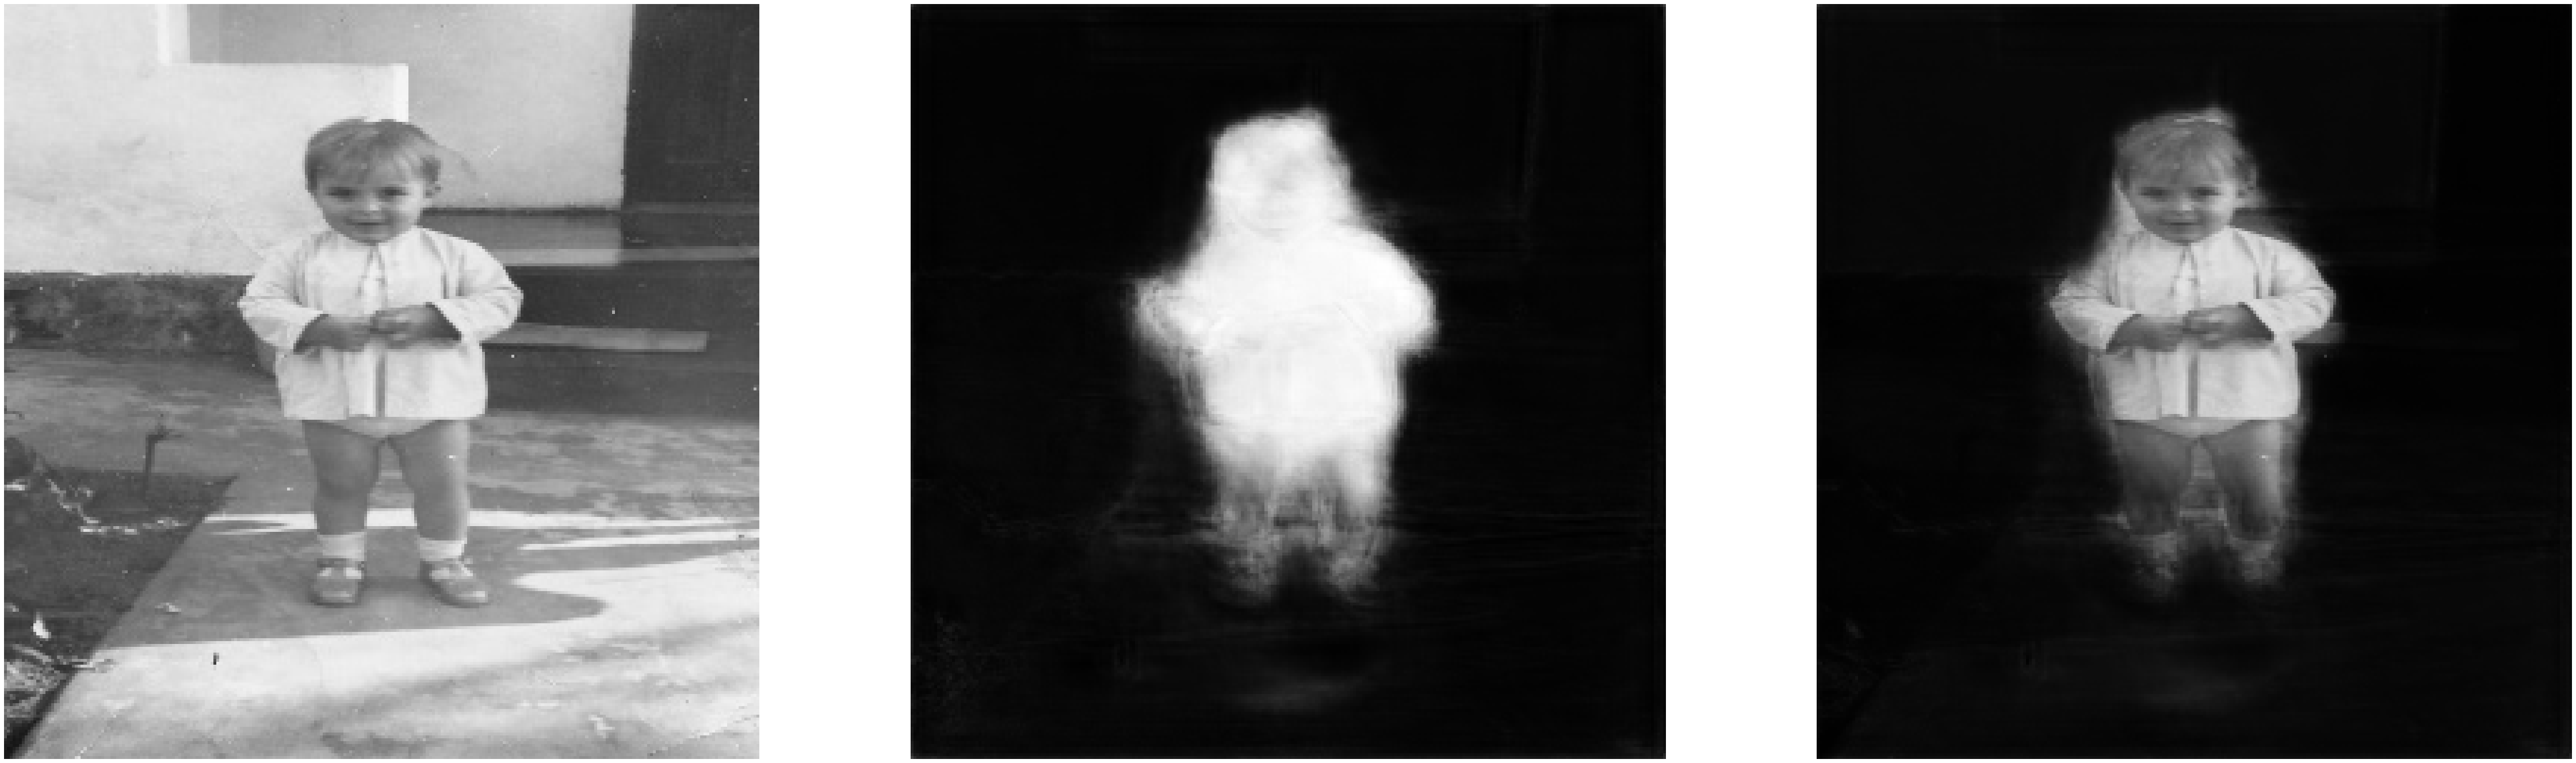

In [31]:
num = 0

pred_mask = uNet.predict(np.expand_dims(img_to_array(load_img(path+"\\"+image[num]))/255,0))
pred_img = img_to_array(load_img(path+"\\"+image[num]))/255

fig, ax = plt.subplots(1, 3, figsize=(80,80))
ax[0].imshow(pred_img)
ax[0].axis('off')
ax[1].imshow(pred_mask[0], cmap='gray')
ax[1].axis('off')
# ax[2].imshow(pred_img*np.where(pred_mask[0]>0.1, 1, 0))
ax[2].imshow(pred_img*pred_mask[0])
ax[2].axis('off')
plt.show()

In [32]:
uNet.save(r'C:\Users\sky66\Desktop\my_model')

INFO:tensorflow:Assets written to: C:\Users\sky66\Desktop\my_model\assets


In [ ]:
a = pred_mask[0]

In [ ]:
a

In [ ]:
np.where(a>0.5, 1, 0)

In [ ]:
plt.imshow(np.where(a>0.1, 1, 0))

In [ ]:
plt.imshow(pred_img*np.where(a>0.1, 1, 0))

# 進行偵測

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import os
import numpy as np
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.backend as K
import cv2

In [ ]:
# 參考網站
# https://stackoverflow.com/questions/61767723/get-config-missing-while-loading-previously-saved-model-without-custom-layers

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [7]:
def dice_coef(y_true, y_pred):
    '''
    Metric
    '''
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


def dice_loss(y_true, y_pred):
    '''
    Loss function
    '''
    loss = 1 - dice_coef(y_true, y_pred)
    return loss


def bce_dice_loss(y_true, y_pred):
    '''
    Mixed crossentropy and dice loss.
    '''
    loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [8]:
uNet = tf.keras.models.load_model(r'C:\Users\sky66\Desktop\my_model', custom_objects={"dice_coef":dice_coef, "dice_loss":dice_loss, "bce_dice_loss":bce_dice_loss})

In [19]:
img_path = r"C:\Users\sky66\Desktop\hq720.jpg"

In [59]:
img_np = cv2.imread(img_path)

In [22]:
img_np = cv2.resize(img_np, (256,256))

In [23]:
img_np.shape

(256, 256, 3)

In [25]:
img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

In [28]:
img_np = img_np/255

In [30]:
img_np = np.expand_dims(img_np, 0)

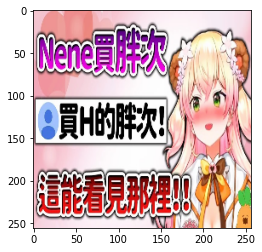

In [33]:
plt.imshow(img_np[0])

In [62]:
img_np.shape[1]

720

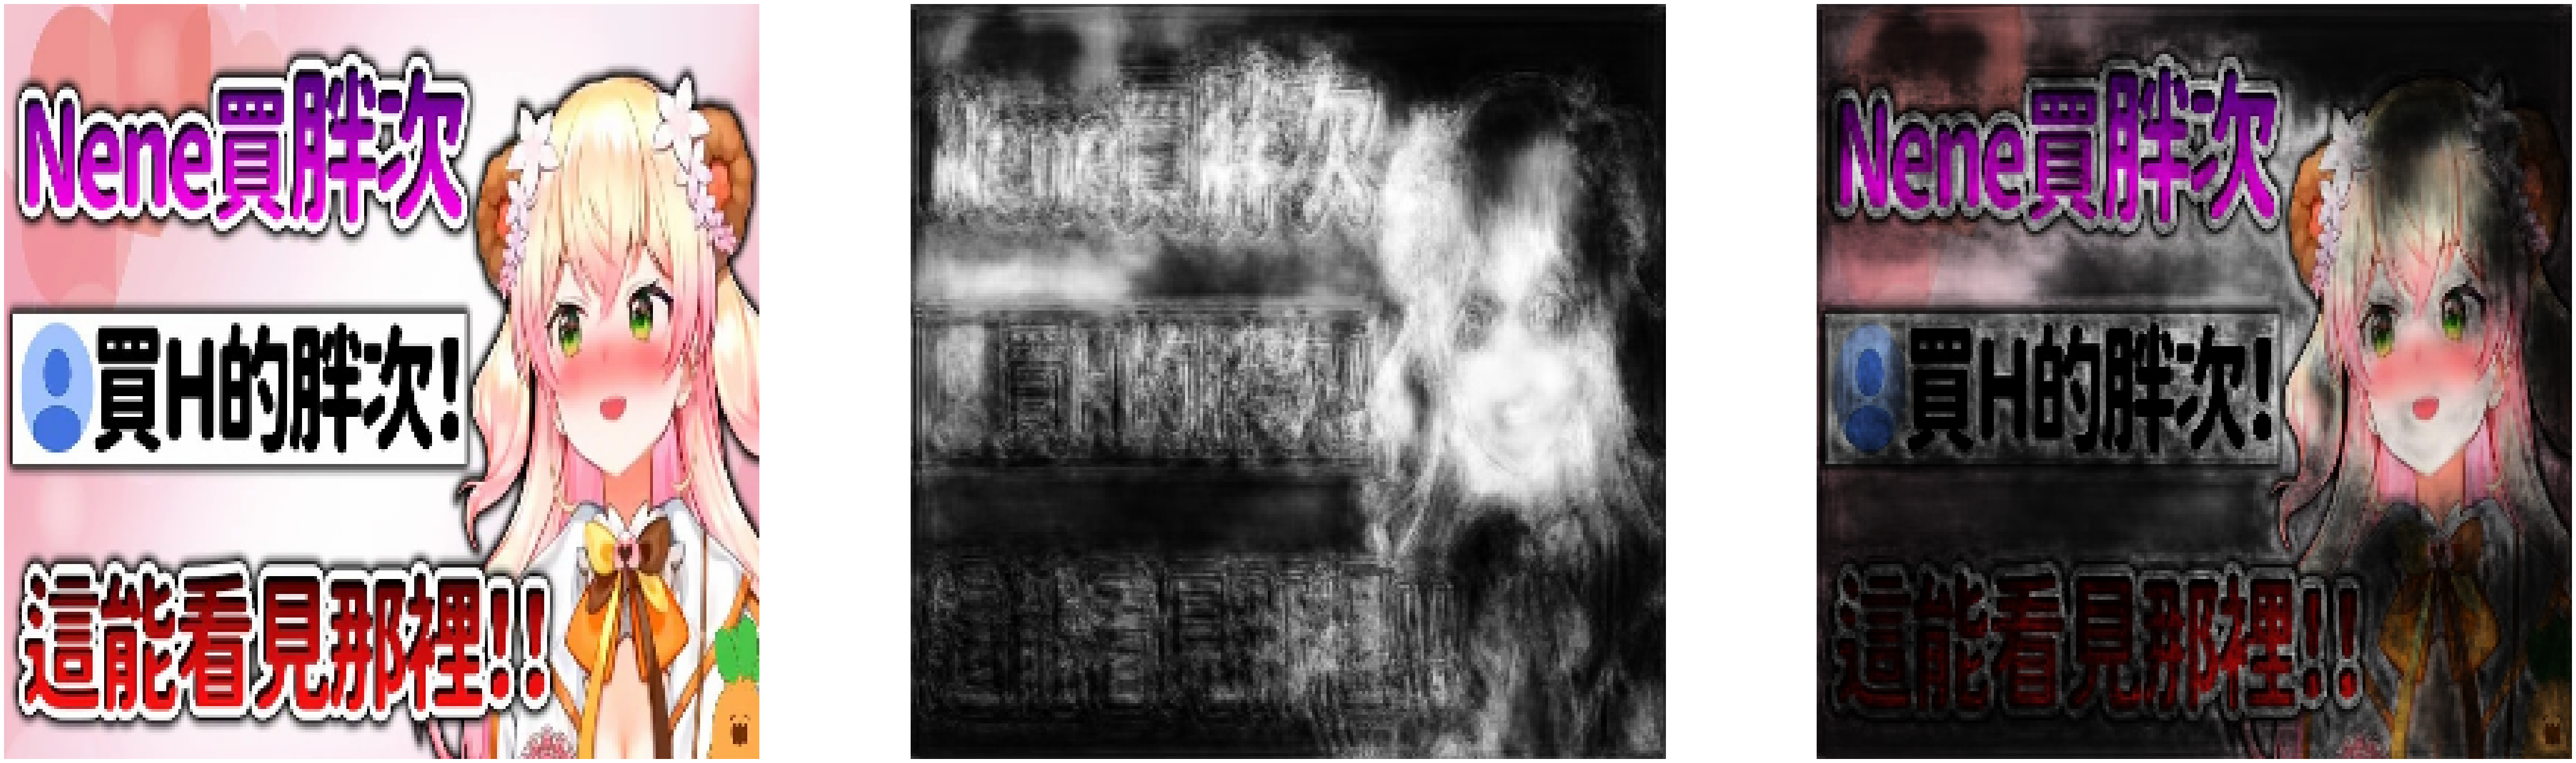

In [34]:
pred_mask = uNet.predict(img_np)
pred_img = img_np[0]

fig, ax = plt.subplots(1, 3, figsize=(80,80))
ax[0].imshow(pred_img)
ax[0].axis('off')
ax[1].imshow(pred_mask[0], cmap='gray')
ax[1].axis('off')
# ax[2].imshow(pred_img*np.where(pred_mask[0]>0.1, 1, 0))
ax[2].imshow(pred_img*pred_mask[0])
ax[2].axis('off')
plt.show()

In [ ]:
C:\Users\sky66\Downloads

In [139]:
def cv2_to_plt(img_np):
    img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
    img_np = img_np/255
    return img_np

def plt_to_cv2(img_np):
    return cv2.cvtColor((img_np*255).astype("uint8"), cv2.COLOR_RGB2BGR)
    
def pred(img_path):    
    # load
    img_np = cv2.imread(img_path)
    img = img_np[:]
    width = img.shape[1]
    height = img.shape[0]
    img_np = cv2.resize(img_np, (256,256))
    
    # use to predict
    img_np = cv2_to_plt(img_np)
    img_np = np.expand_dims(img_np, 0)
    
    # predict
    pred_mask = uNet.predict(img_np)
    pred_mask = pred_mask[0]
    
    # process image
    # mask is GRAYSCALE
    pred_mask = pred_mask*255
    pred_mask = cv2.resize(pred_mask, (width,height))
    pred_mask = pred_mask/255
    pred_mask = np.reshape(pred_mask,(height,width,1))
    img = cv2_to_plt(img)
    
    # view
    #fig, ax = plt.subplots(1, 3, figsize=(80,80))
    #ax[0].imshow(img)
    #ax[0].axis('off')
    #ax[1].imshow(pred_mask, cmap='gray')
    #ax[1].axis('off')
    ## ax[2].imshow(pred_img*np.where(pred_mask>0.1, 1, 0))
    #ax[2].imshow(img*pred_mask)
    #ax[2].axis('off')
    #plt.show()    
    return pred_mask*255, plt_to_cv2(img), plt_to_cv2(img*pred_mask)

In [144]:
store = r"C:\Users\sky66\Desktop\predict"

In [98]:
cv2.destroyAllWindows()

In [172]:
def stored(path):
    store = r"C:\Users\sky66\Desktop\predict"
    name = path.split("\\")[-1].split(".")[0]
    a,b,c = pred(path)
    cv2.imwrite(store+"\\"+name+"_image.jpg", b)
    cv2.imwrite(store+"\\"+name+"_mask.jpg", a)   
    cv2.imwrite(store+"\\"+name+"_predict.jpg", c)    

In [156]:
stored(r"C:\Users\sky66\Downloads\hh.jpg")

In [157]:
stored(r"C:\Users\sky66\Downloads\Rickrolling.jpg")

In [158]:
stored(r"C:\Users\sky66\Downloads\rickroll-4k.jpg")

In [159]:
stored(r"C:\Users\sky66\Downloads\20220409000095.jpg")

In [160]:
stored(r"C:\Users\sky66\Downloads\20224141045.jpg")

In [161]:
stored(r"d6274852.jpg")

In [162]:
stored(r"C:\Users\sky66\Downloads\20220413-104801_U18448_M756806_f565.jpeg")

In [163]:
stored(r"C:\Users\sky66\Downloads\211112-rushia- (14).jpg")

In [164]:
stored(r"C:\Users\sky66\Downloads\994e86a3-3061-4b32-a73d-f1ec8d0f6640.jpg")

In [165]:
stored(r"C:\Users\sky66\Downloads\rushiaboingboing.jpg")

In [166]:
stored(r"C:\Users\sky66\Downloads\60159880_101.jpg")

In [167]:
stored(r"C:\Users\sky66\Downloads\GettyImages-1238175215.jpg")

In [168]:
stored(r"C:\Users\sky66\Downloads\1239295205.0.jpg")

In [169]:
stored(r"C:\Users\sky66\Downloads\Putin1400-640x640-c-default.jpeg")

In [173]:
stored(r"C:\Users\sky66\Downloads\maxresdefault.jpg")

In [174]:
stored(r"C:\Users\sky66\Downloads\maxresdefault (1).jpg")

In [175]:
stored(r"C:\Users\sky66\Downloads\27331778_932690610229052_8243630079108248305_n.jpg")

In [176]:
stored(r"C:\Users\sky66\Downloads\images.jpg")

In [177]:
stored(r"C:\Users\sky66\Downloads\180757ekh3zeefgg7gkcap.jpg")

In [178]:
stored(r"C:\Users\sky66\Downloads\images (1).jpg")

In [179]:
stored(r"C:\Users\sky66\Downloads\images (2).jpg")

In [180]:
stored(r"C:\Users\sky66\Downloads\unnamed.jpg")

In [182]:
stored(r"C:\Users\sky66\Downloads\aa(1).jpg")

In [183]:
stored(r"C:\Users\sky66\Downloads\images (3).jpg")

In [184]:
stored(r"C:\Users\sky66\Downloads\fbd19525-6a40-47df-96a2-f2019db950101580889881.jpg")